<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


In [3]:
import os
os.listdir(path)

['insurance.csv']

In [4]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "insurance.csv"))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


범주형 데이터 인코딩    
머신러닝 모델을 사용하려면 문자형 데이터를 숫자로 변환해야 함

In [ ]:
# df_encoded = pd.get_dummies(df, drop_first=True)
# df_encoded.head()

흡연 여부에 따른 보험료 차이

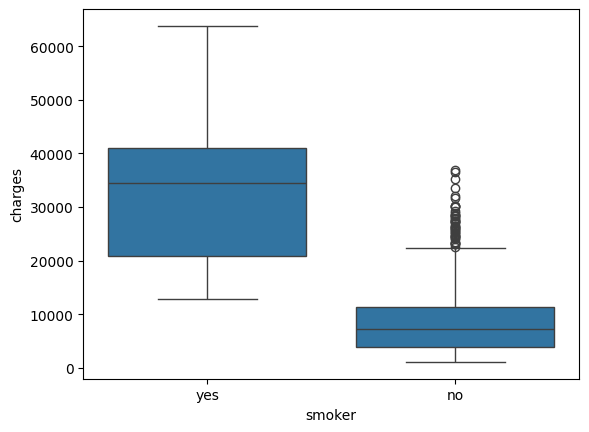

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="smoker", y="charges", data=df)
plt.show()


머신러닝 예제 (선형 회귀)

In [7]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# X = df_encoded.drop("charges", axis=1)
# y = df_encoded["charges"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
# print("R2:", r2_score(y_test, y_pred))


수치형 변수: 요약 통계로 확인 (describe())

먼저 숫자형 변수들이 말이 되는 값인지 확인

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


범주형 변수: 값의 종류 확인 (value_counts())

문자형 변수는 이상한 카테고리가 있는지 본다

In [9]:
categorical_cols = ["sex", "smoker", "region"]

for col in categorical_cols:
    print(f"\n[{col}]")
    print(df[col].value_counts())


[sex]
sex
male      676
female    662
Name: count, dtype: int64

[smoker]
smoker
no     1064
yes     274
Name: count, dtype: int64

[region]
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


히스토그램으로 분포 확인 (수치형)

분포가 비정상적으로 찌그러져 있는지 본다

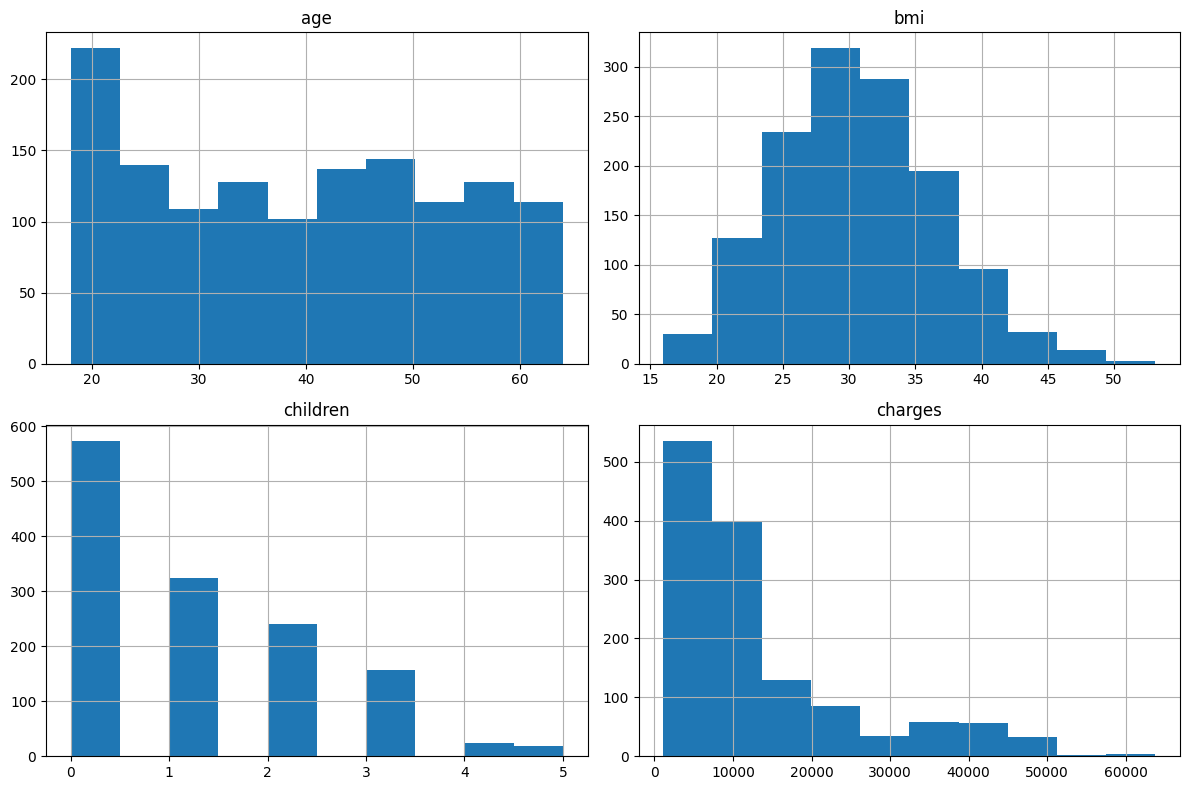

In [10]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

의료비

대부분 0 ~ 15,000 구간에 몰림

오른쪽 꼬리가 매우 김 (long right tail)

최대 약 64,000

소수의 고액 환자가 평균을 끌어올리는 구조

전형적인 비대칭 분포 (right-skewed)

박스플롯으로 이상치 확인

In [13]:
# plt.figure(figsize=(10, 6))
# df.boxplot()
# plt.xticks(rotation=45)
# plt.show()

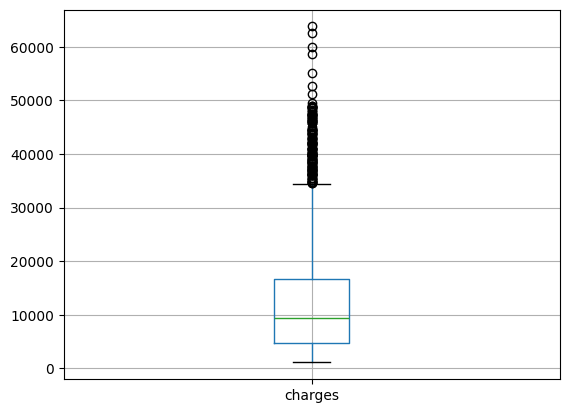

In [19]:
# df.boxplot(column="age")
# plt.title("Age Boxplot")
# plt.show()

# df.boxplot(column="bmi")
# plt.title("BMI Boxplot")
# plt.show()

# df.boxplot(column="children")
# plt.title("Children Boxplot")
# plt.show()

df.boxplot(column=["charges"])
plt.show()

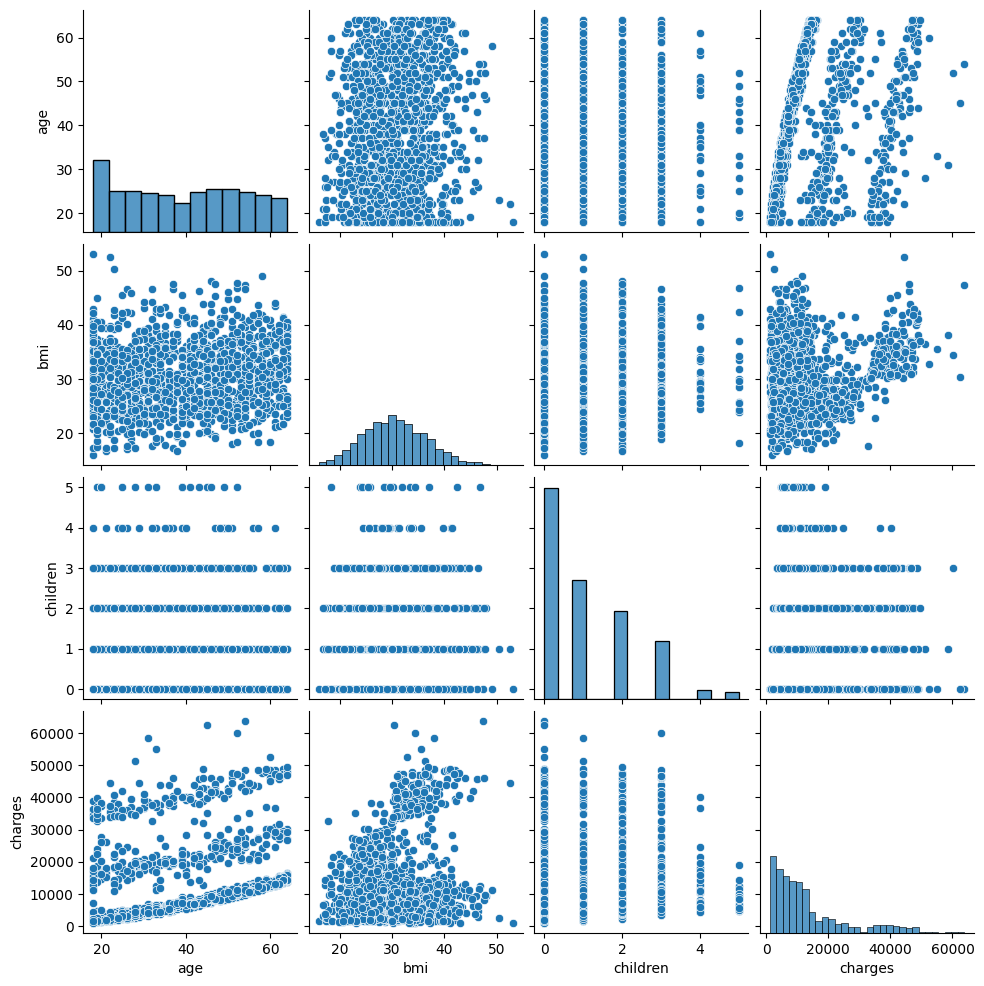

In [21]:
sns.pairplot(df)
plt.show()

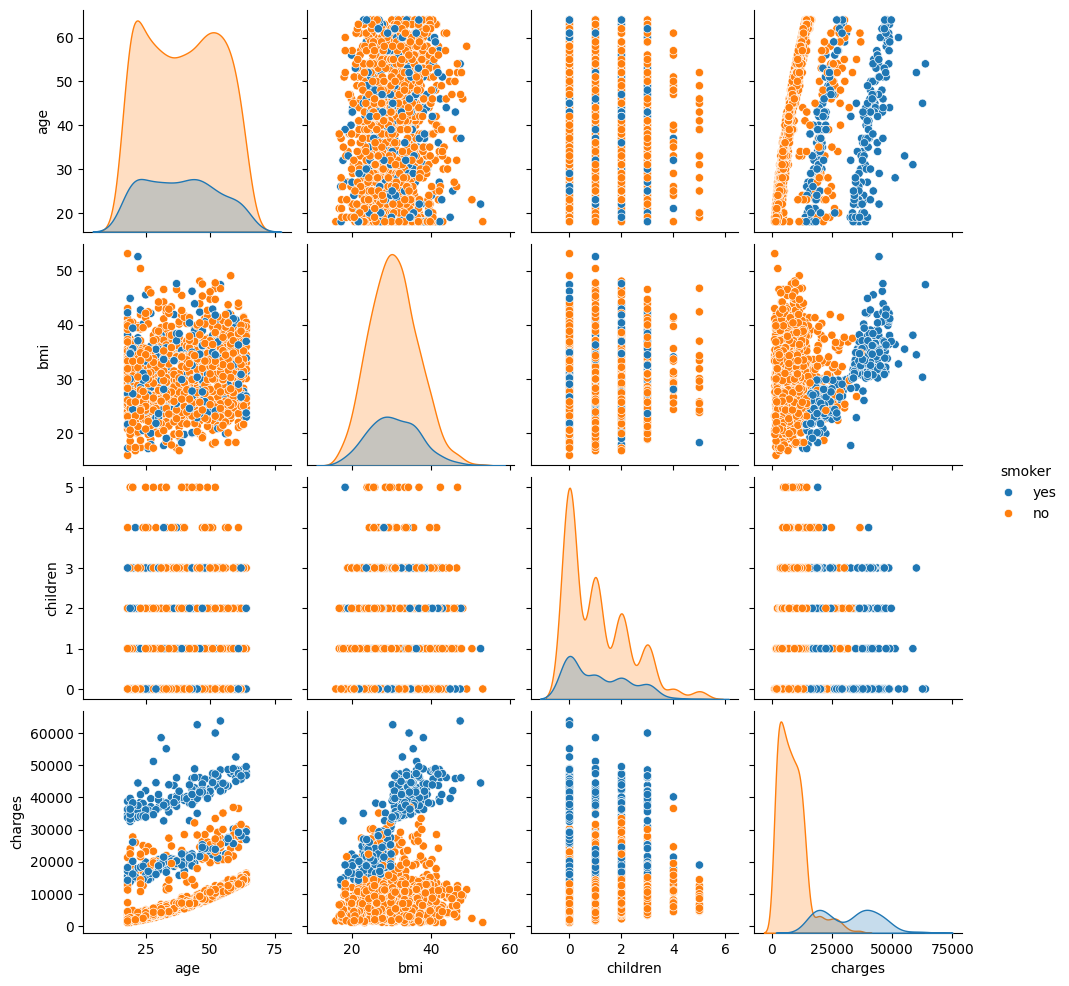

In [22]:
sns.pairplot(
    df,
    vars=["age", "bmi", "children", "charges"],
    hue="smoker"
)
plt.show()

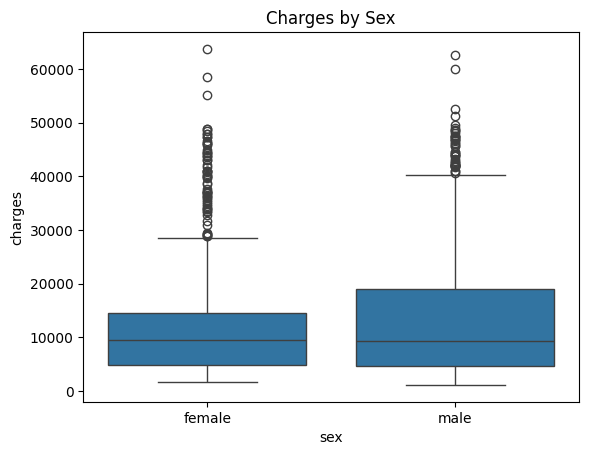

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="sex", y="charges", data=df)
plt.title("Charges by Sex")
plt.show()

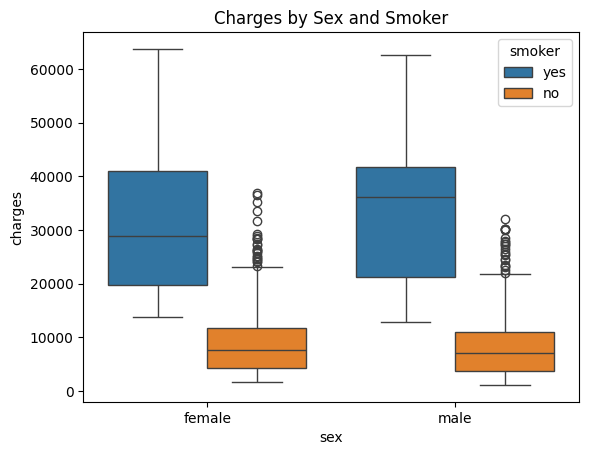

In [24]:
sns.boxplot(x="sex", y="charges", hue="smoker", data=df)
plt.title("Charges by Sex and Smoker")
plt.show()

흡연 여부에 따라 BMI가 의료비에 미치는 영향은 달라지는가?

흡연자 + 고BMI = 의료비 폭증

조건부 관계

<Axes: xlabel='bmi', ylabel='charges'>

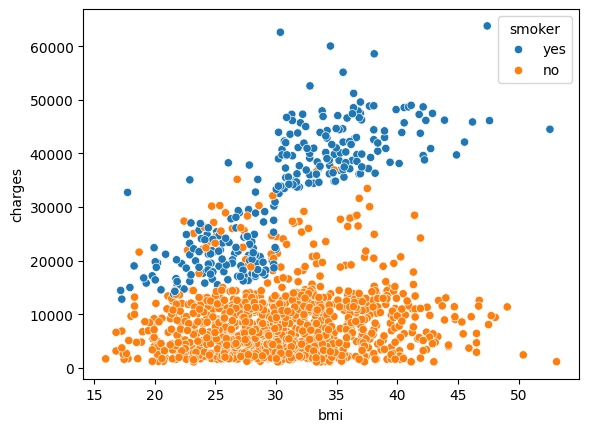

In [25]:
sns.scatterplot(
    x="bmi", y="charges",
    hue="smoker", data=df
)

나이(age)와 의료비의 관계는 선형적인가?

pairplot에서 완전한 직선이 아님

고령 구간에서 분산 증가

<Axes: xlabel='age', ylabel='charges'>

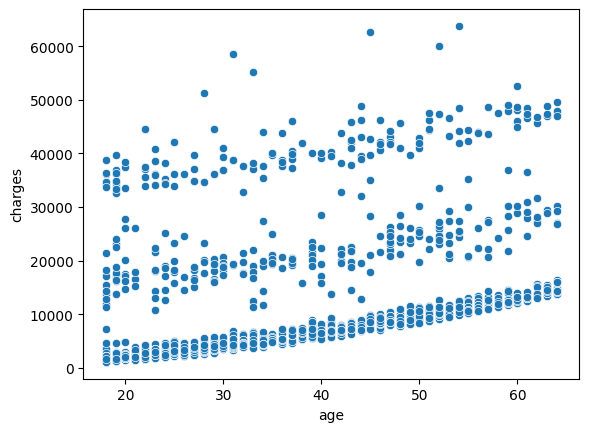

In [26]:
sns.scatterplot(x="age", y="charges", data=df)

흡연 여부에 따라 의료비의 변동성(분산)은 다른가?

In [27]:
df.groupby("smoker")["charges"].std()

,charges
smoker,
no,5993.781819
yes,11541.547176


In [29]:
# from scipy.stats import ttest_ind

# smoker = df[df["smoker"] == "yes"]["charges"]
# non_smoker = df[df["smoker"] == "no"]["charges"]

# ttest_ind(smoker, non_smoker, equal_var=False)

흡연자만 필터링

그 안에서 low_bmi, high_bmi를 나눔

=> 흡연자 집단 내에서 BMI 수준에 따른 평균 의료비 차이를 보려고

귀무가설: 흡연자 집단에서 BMI < 30과 BMI >= 30 집단 간 평균 의료비 차이는 없다

대립가설: 두 집단의 평균 의료비는 다르다



---

두 그룹은 서로 독립적이며, 종속변수인 의료비는 연속형 변수이므로 두 집단 평균 비교에 적합한 독립표본 t-검정을 사용

의료비 분포의 비대칭성과 분산 차이를 고려하여, 등분산을 가정하지 않는 Welch t-검정을 적용

In [32]:
from scipy.stats import ttest_ind

# 흡연자만 필터링
smokers = df[df["smoker"] == "yes"]

# BMI 기준으로 그룹 나누기
low_bmi = smokers[smokers["bmi"] < 30]["charges"]
high_bmi = smokers[smokers["bmi"] >= 30]["charges"]

# t-test
t_stat, p_value = ttest_ind(low_bmi, high_bmi, equal_var=False)

t_stat, p_value

(np.float64(-30.10802850671695), np.float64(1.8781988960137995e-88))

t_stat = -30.188은 high_bmi 평균이 low_bmi 평균보다 높다는 것을 의미한다.

(평균 차이가 표준오차의 30배)

BMI >= 30인 흡연자의 평균 의료비가 BMI < 30인 흡연자의 평균 의료비보다 훨씬 높다.

p-value가 0에 가깝게 나왔기 때문에 통계적으로 유의미하다.

In [49]:
# from scipy.stats import mannwhitneyu

# mannwhitneyu(low_bmi, high_bmi, alternative="two-sided")


#  나이 증가에 따른 의료비 증가 패턴은 흡연 여부에 따라 어떻게 달라지는가?

의료비를 로그로 변환해서 새로운 컬럼에 넣었다.

의료비(charges) 데이터 특징이, 분포가 한쪽으로 길게 치우쳐져(skewed) 있기 때문에.

로그화함으로써 변동성이 줄어들고 이상치 영향이 감소한다. (극단적인 큰 값들의 영향이 줄어든다)

In [34]:
import numpy as np
df["log_charges"] = np.log(df["charges"])

- 회귀분석에서 문자열은 직접 쓸 수 없으므로 숫자 0/1로 변환

  - (0이면 비흡연자, 1이면 흡연자)

  - smoker_bin 컬럼이 생김

- age와 smoker_bin의 상호작용(interaction) 항 생성
  - 나이와 흡연의 상호작용 효과를 보기 위해 (회귀에서 나이 효과가 흡연 여부에 따라 달라지는지 확인)

In [35]:
df["smoker_bin"] = df["smoker"].map({"no": 0, "yes": 1})
df["age_smoker"] = df["age"] * df["smoker_bin"]

로그 변환한 의료비(log_charges)를 종속변수로, '나이/흡연/나이와 흡연의 상호작용'을 독립변수로 한 선형회귀(ols)를 수행


In [36]:
import statsmodels.api as sm

X = df[["age", "smoker_bin", "age_smoker"]]
X = sm.add_constant(X)

y = df["log_charges"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1550.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        03:01:28   Log-Likelihood:                -781.79
No. Observations:                1338   AIC:                             1572.
Df Residuals:                    1334   BIC:                             1592.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1337      0.040    180.169      0.0

나이가 증가할수록 의료비는 증가하지만,
그 증가 패턴은 흡연 여부에 따라 유의미하게 달라진다.

- 종속변수

  - log_charges
    - → 의료비에 로그 변환 적용 (왜곡된 분포 보정)

- 독립변수

    - age : 나이

    - smoker_bin : 흡연 여부 (0=비흡연, 1=흡연)

    - age_smoker : 나이 × 흡연 여부 (상호작용 항)

- R-squared = 0.777

  - 전체 의료비 변동의 77.7%를 설명

  - 매우 높은 설명력

- age = +0.0420 (p < 0.001)

  - 비흡연자의 경우, 나이가 1살 증가할 때 로그 의료비는 평균적으로 0.042 증가

  - 통계적으로 유의
  
  - 나이 증가 → 의료비 증가 (상식적)

- smoker_bin = +2.7715 (p < 0.001)

  - 같은 나이일 때, 흡연자는 비흡연자보다 로그 의료비가 평균적으로 약 2.77 더 높음

  - 로그 기준이므로 실제 의료비 차이는 매우 큼

  - 흡연 효과 강함
  - 통계적으로 유의

- age_smoker = –0.0317 (p < 0.001)
  - 흡연자의 경우, 나이에 따른 의료비 증가 효과는 비흡연자에 비해 0.0317만큼 감소
  - 비흡연자의 경우 나이 증가에 따른 효과는 +0.042지만, 흡연자의 경우 나이 증가에 따른 효과가 0.042 – 0.0317 ≈ +0.0103이다
  - 흡연자는 기본 의료비 수준은 매우 높지만 나이가 늘어날수록 증가하는 “기울기”는 더 완만한 것으로 보인다
  - 나이X의료비 관계는 흡연 여부에 따라 다르며, 상호작용 효과는 통계적으로 유의

    - 나이 증가에 따른 의료비 증가 효과는 흡연 여부에 따라 통계적으로 유의미하게 달라지는 것으로 나타남
    - 비흡연자의 경우 나이가 증가할수록 의료비가 뚜렷하게 증가하는 반면에 흡연자는 이미 높은 의료비 수준을 가지며 나이에 따른 증가 폭은 상대적으로 완만하였음

결론

나이와 의료비의 관계는 흡연 여부에 따라 달라지며,
이 차이는 회귀 분석을 통해 통계적으로 유의미함이 확인됨



---



# 회귀 결과 시각화

x축: 나이, y축: 의료비(로그 취함)

hue="smoker", 흡연 여부별로 다른 색상

선형 회귀선과 데이터 점 표시

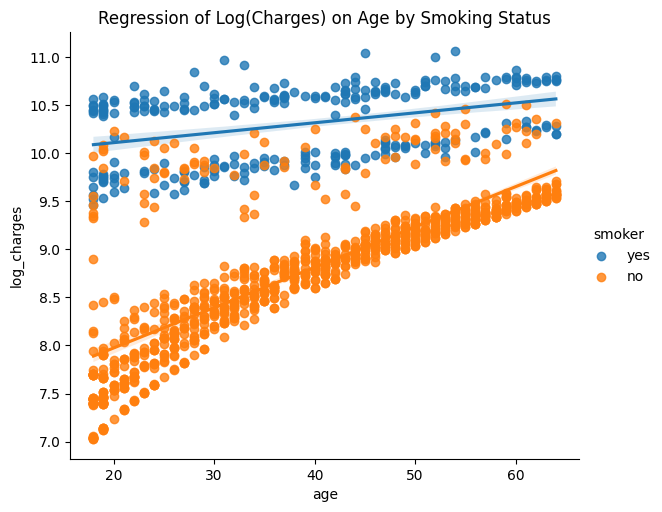

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    x="age",
    y="log_charges",
    hue="smoker",
    data=df,
    aspect=1.2
)
plt.title("Regression of Log(Charges) on Age by Smoking Status")
plt.show()

두 개의 회귀선 - 나이에 따른 증가 폭을 각각 나타냄

흡연자와 비흡연자의 선의 시작점 높이 차이가 존재한다. 흡연자가 기본 의료비가 높다.

비흡연자(주황) 선이 더 가파르다. 나이에 따른 의료비 증가폭이 비흡연자에서 더 크다는 의미이다.


---



비흡연자 기울기 = 0.042

흡연자 기울기 = 0.042 − 0.0317 = 0.0103

비흡연자: 나이 1살 ↑ → 의료비 +0.042

흡연자: 나이 1살 ↑ → 의료비 +0.0103

“흡연자는 기본 의료비 수준은 매우 높지만 나이가 늘어날수록 증가하는 ‘기울기’는 더 완만”


---


“상호작용 효과가 유의하다"

=> 나이가 높아짐에 따른 의료비 증가의 관계가 흡연 여부에 따라 달라진다

=> 비흡연자용 기울기, 흡연자용 기울기가 따로 존재


---


상호작용 항(age × smoker)이 음(-)의 값으로 유의하게 나타나, 흡연자의 경우 나이에 따른 의료비 증가 효과가 비흡연자보다 유의하게 작음을 알 수 있음



---


## 로그 스케일

지금 계수들은 log(charges) 기준

0.042 → 약 4.2% 증가

0.0103 → 약 1.0% 증가

# 흡연자 중에서도 BMI 수준에 따라 의료비에 차이가 존재하는가?

흡연자 행만 모은 독립된 데이터프레임 복사본 생성

In [38]:
smokers = df[df["smoker"] == "yes"].copy()

흡연자 데이터(smokers)에서 BMI를 네 그룹으로 나누고, 각 그룹 이름을 새 컬럼에 붙임

underweight, normal, overweight, obese

In [39]:
bins = [0, 18.5, 25, 30, float("inf")]
labels = ["Underweight", "Normal", "Overweight", "Obese"]

smokers["bmi_group"] = pd.cut(smokers["bmi"], bins=bins, labels=labels)

bmi_group 컬럼에 있는 각 범주의 빈도수(몇 명인가)를 세어서 내림차순 정렬

In [40]:
smokers["bmi_group"].value_counts()

,count
bmi_group,
Obese,144
Overweight,75
Normal,50
Underweight,5


흡연자 데이터(smokers)에서 의료비(charges)를 로그 변환함

In [41]:
smokers["log_charges"] = np.log(smokers["charges"])

흡연자 데이터에서 BMI 그룹별로 의료비 차이가 통계적으로 유의한지 ANOVA로 검정

일원분산분석 수행

귀무가설: BMI 그룹별 의료비 평균이 같다

대립가설: 적어도 하나의 그룹 평균이 다르다



---

종속변수는 연속형 변수이며, 비교하고자 하는 집단의 수가 3개 이상이므로 다수 집단 간 평균 비교에 적합한 ANOVA를 사용

의료비 분포의 왜도를 완화하기 위해 로그 변환된 의료비(log_charges)를 사용하여 분석을 수행

In [42]:
from scipy.stats import f_oneway

groups = [
    smokers[smokers["bmi_group"] == g]["log_charges"]
    for g in labels
]

f_stat, p_value = f_oneway(*groups)

f_stat, p_value

(np.float64(348.7269062763205), np.float64(1.569982455002479e-92))

F 통계량 - 그룹 간 평균 차이가 표준오차에 비해 얼마나 큰지를 나타내며, 숫자가 클수록 그룹 간 차이가 크다는 의미

p-value가 거의 0으로 나왔기 때문에 귀무가설이 기각됨

흡연자 집단에서 BMI 그룹별로 로그 의료비 평균은 통계적으로 유의하게 차이가 있다

흡연자 집단에서 BMI 그룹별 평균 의료비는 Underweight < Normal < Overweight < Obese 순으로 증가하며,

특히 비만 그룹에서 의료비가 크게 상승함을 확인

In [43]:
smokers.groupby("bmi_group")["charges"].mean()

/tmp/ipython-input-1226244515.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smokers.groupby("bmi_group")["charges"].mean()


,charges
bmi_group,
Underweight,18809.824980
Normal,19942.223641
Overweight,22491.182935
Obese,41692.808992


흡연자(smokers) 집단을 BMI 그룹별로 나누어 의료비(charges) 분포를 비교한 시각화

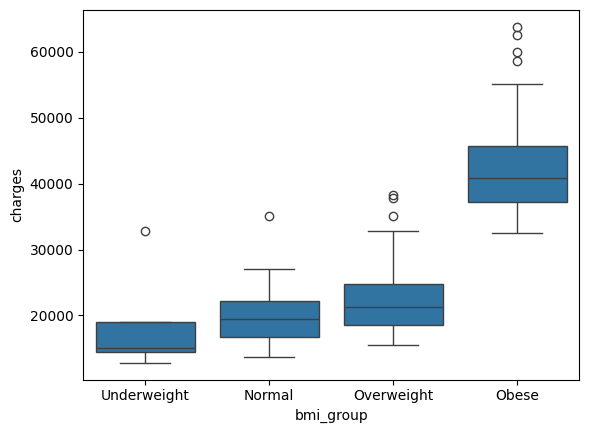

In [44]:
sns.boxplot(x="bmi_group", y="charges", data=smokers)
plt.show()

obese 그룹이 중앙값이 가장 높고, 분포 폭도 넓음

의료비가 매우 높은 환자가 많고 변동성도 크다

underweight, normal, overweight 그룹은 중앙값이 순서대로 증가하는 경향을 보인다

In [45]:
df["bmi_group"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, float("inf")],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

In [46]:
df["log_charges"] = np.log(df["charges"])

statsmodels 라이브러리를 사용

두 범주형 변수(smoker, bmi_group)의 주효과와 상호작용 효과가 종속변수(log_charges)에 미치는 영향을 분석

이원분산분석 (Two-way ANOVA)

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(
    "log_charges ~ C(smoker) * C(bmi_group)",
    data=df
).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(smoker),502.625507,1.0,1131.090528,5.886535e-180
C(bmi_group),20.913360,3.0,15.687560,4.977768e-10
C(smoker):C(bmi_group),17.860601,3.0,13.397620,1.287414e-08
Residual,591.015403,1330.0,NaN,NaN


F값과 p-value를 봤을 때

흡연 여부, BMI 그룹, 흡연 여부와 BMI 그룹 간 상호작용 효과 전부 로그 의료비에 통계적으로 유의한 영향이 있음

두 변수의 결합 효과가 존재

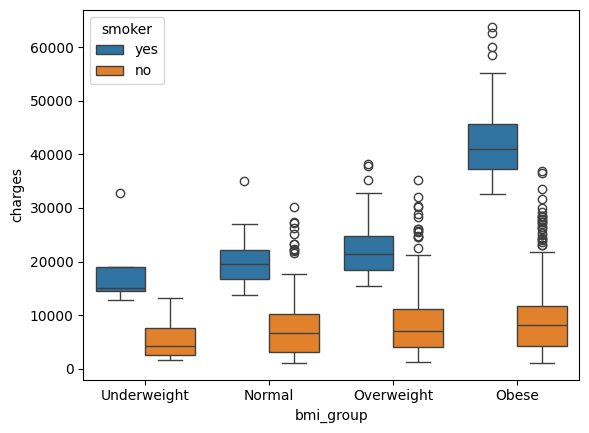

In [48]:
sns.boxplot(
    x="bmi_group",
    y="charges",
    hue="smoker",
    data=df
)
plt.show()


첫 번째 비교 가설은 흡연자 집단 내에서 BMI 범주에 따른 의료비 차이를 검증하는 것이었다.
이를 위해 흡연자만을 대상으로 일원분산분석을 수행하였다.
추가적으로, 해당 패턴이 흡연 여부에 따라 달라지는지를 확인하기 위해
흡연 여부와 BMI 범주를 함께 고려한 이원분산분석을 보조적으로 수행하였다.

흡연자만을 대상으로 한 분석에서는 BMI 범주에 따라 의료비가 증가하는 경향이 뚜렷하게 나타났다.
이어서 흡연 여부를 함께 고려한 분석 결과, BMI 범주에 따른 의료비 차이는
비흡연자보다 흡연자 집단에서 더 크게 나타났으며,
이는 두 변수 간 상호작용 효과가 존재함을 시사한다.

흡연 여부와 BMI 범주는 각각 의료비에 유의미한 영향을 미치며,

BMI 범주에 따른 의료비 차이는 흡연 여부에 따라 달라진다.


---


흡연자와 비흡연자 간 의료비 차이는 통계적으로 유의미하다.

BMI 범주에 따라 의료비 평균에는 통계적으로 유의미한 차이가 존재

BMI 범주에 따른 의료비 차이는 흡연 여부에 따라 달라진다. (상호작용 효과 존재)


---


박스플롯

비흡연자(no) - BMI가 증가해도 의료비 증가 폭이 비교적 완만

흡연자(yes) - BMI가 증가할수록 의료비가 가파르게 증가

특히 비만(Obese) 흡연자에서 의료비가 가장 큼


---


흡연 여부와 BMI 범주가 의료비에 미치는 영향을 동시에 분석하기 위해
이원분산분석을 수행

분석 결과, 흡연 여부와 BMI 범주는 각각 의료비에 통계적으로 유의미한 영향을 미쳤으며, 두 변수 간의 상호작용 효과 또한 유의미하게 나타남

이는 BMI 범주에 따른 의료비 차이가 흡연 여부에 따라 달라짐을 의미한다.

특히 흡연자 집단에서 비만 그룹의 의료비가 가장 높게 나타나,

흡연과 높은 BMI가 결합될 경우 의료비 부담이 크게 증가함을 시사

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
    Normal       Obese   0.2594 0.0012  0.0799  0.4389   True
    Normal  Overweight   0.0706 0.7922  -0.126  0.2673  False
    Normal Underweight  -0.2299 0.6872 -0.7655  0.3058  False
     Obese  Overweight  -0.1888 0.0061 -0.3375 -0.0401   True
     Obese Underweight  -0.4893 0.0737 -1.0092  0.0307  False
Overweight Underweight  -0.3005 0.4566 -0.8266  0.2256  False
-------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
    Normal       Obese   0.7487    0.0  0.6738  0.8236   True
    Normal  Overweight   0.1175 0.0018  0.0342  0.2008   True
    Normal Underweight  -0.0994 0.6267 -0.3134  0.1146  False
     Obe

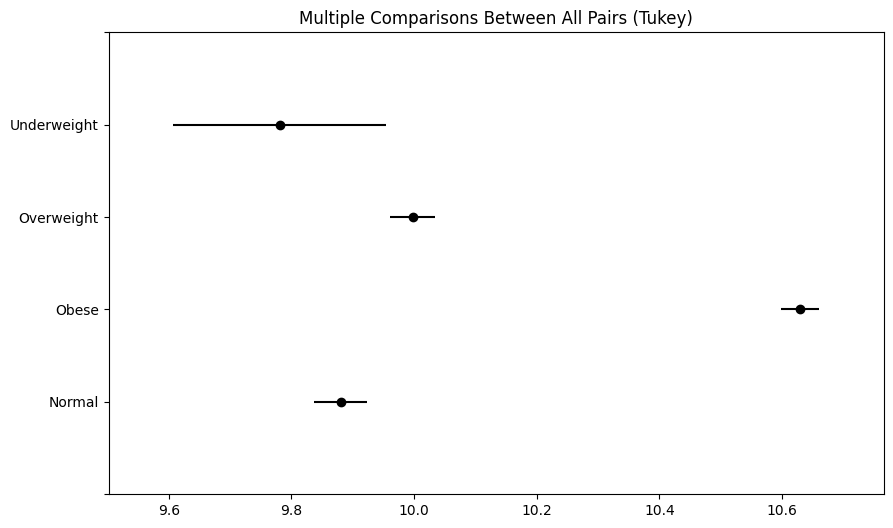

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(endog=df["log_charges"],  # 종속변수
                                 groups=df["bmi_group"],   # 그룹 변수
                                 alpha=0.05)               # 유의수준

print(tukey_result)


smokers = df[df["smoker"] == "yes"]
tukey_result = pairwise_tukeyhsd(endog=smokers["log_charges"], groups=smokers["bmi_group"])
print(tukey_result)

tukey_result.plot_simultaneous()
plt.show()
